Training data:
angry: 3995
fear: 4097
happy: 7215
neutral: 4965
sad: 4830
surprise: 3171
disgust: 436

Test data:
angry: 958
fear: 1024
happy: 1774
neutral: 1233
sad: 1247
surprise: 831
disgust: 111

Total training images: 28709
Total test images: 7178


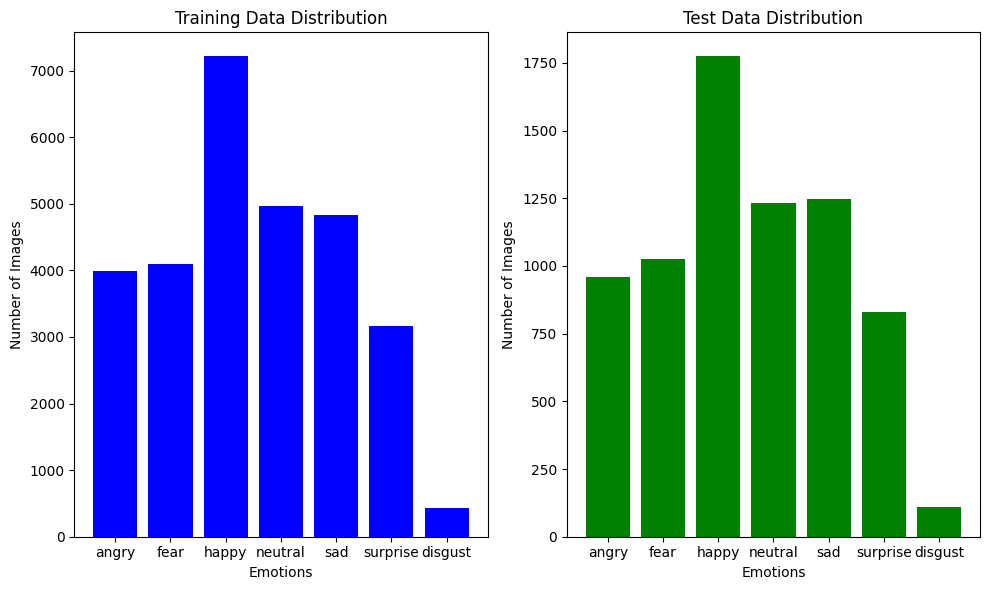

In [2]:
import os
import matplotlib.pyplot as plt

# Define categories
categories = ['angry', 'fear', 'happy', 'neutral', 'sad', 'surprise', 'disgust']

# Count images in each category for training data
train_dir = 'train/'
train_counts = {category: len(os.listdir(os.path.join(train_dir, category))) for category in categories}

print('Training data:')
for category, count in train_counts.items():
    print(f'{category}: {count}')

# Count images in each category for test data
test_dir = 'test/'
test_counts = {category: len(os.listdir(os.path.join(test_dir, category))) for category in categories}

print('\nTest data:')
for category, count in test_counts.items():
    print(f'{category}: {count}')

# Total number of images in each dataset
total_train_images = sum(train_counts.values())
total_test_images = sum(test_counts.values())
print(f'\nTotal training images: {total_train_images}')
print(f'Total test images: {total_test_images}')

# Visualize the distribution of images in both datasets
plt.figure(figsize=(10, 6))

# Plot for training data
plt.subplot(1, 2, 1)
plt.bar(train_counts.keys(), train_counts.values(), color='blue')
plt.title('Training Data Distribution')
plt.xlabel('Emotions')
plt.ylabel('Number of Images')

# Plot for test data
plt.subplot(1, 2, 2)
plt.bar(test_counts.keys(), test_counts.values(), color='green')
plt.title('Test Data Distribution')
plt.xlabel('Emotions')
plt.ylabel('Number of Images')

plt.tight_layout()
plt.show()


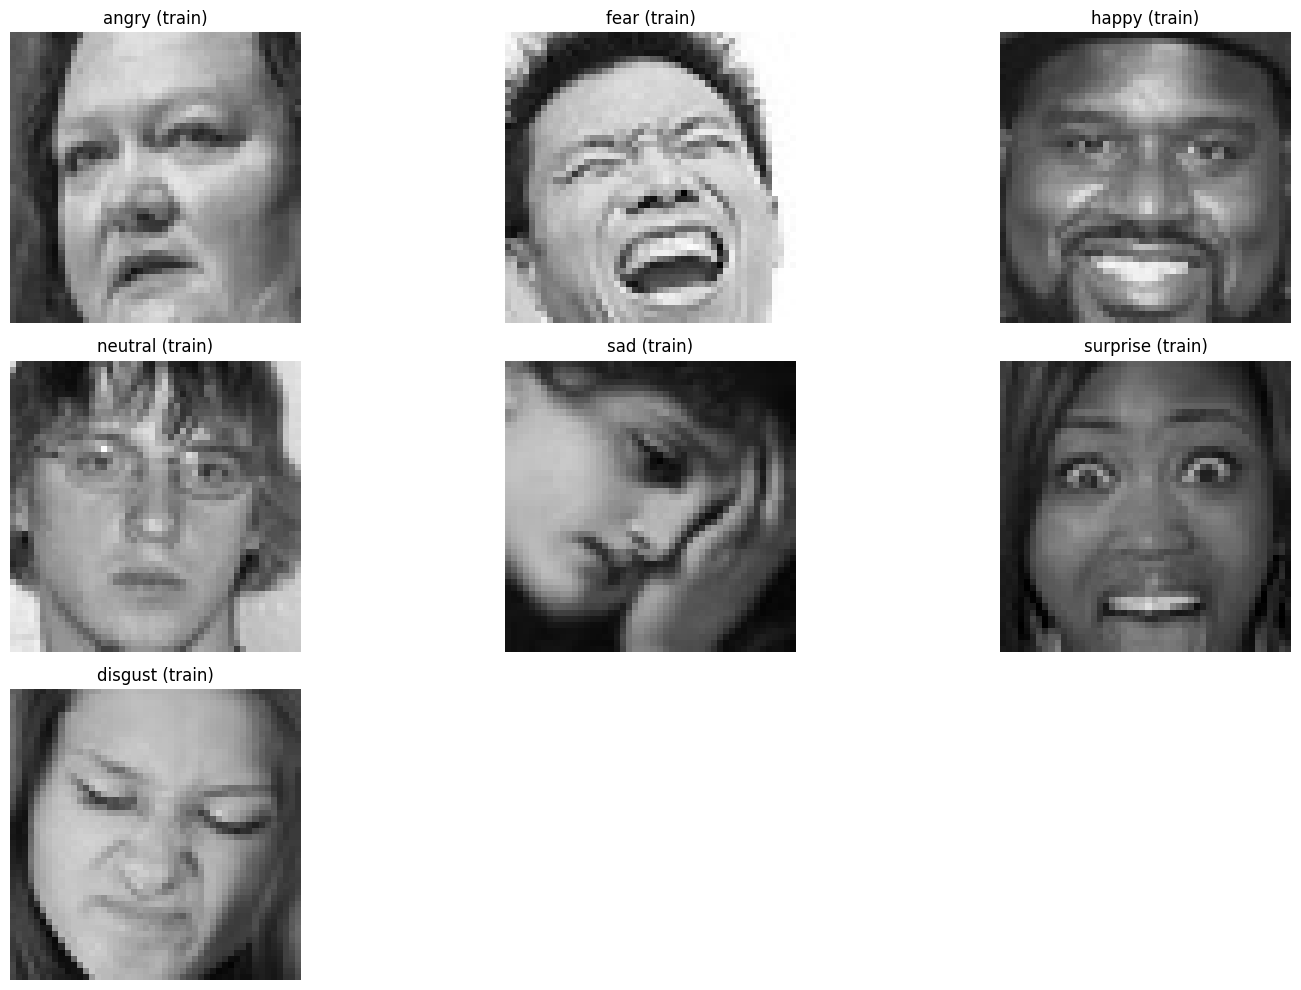

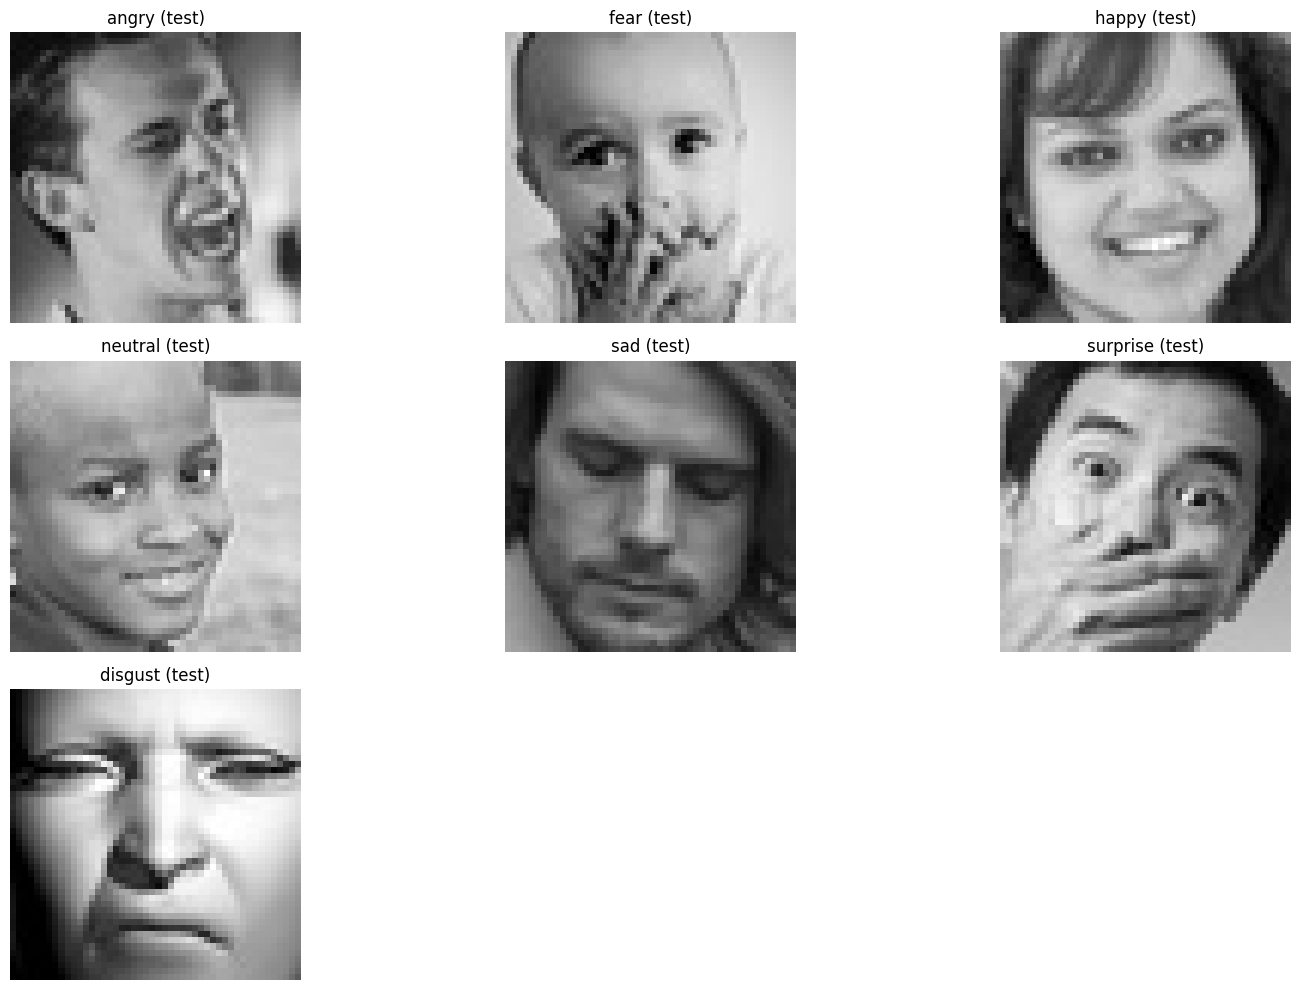

In [3]:
import random
import cv2

def show_random_images(data_dir, categories, dataset_type='train'):
    plt.figure(figsize=(15, 10))
    for i, category in enumerate(categories):
        # Pick a random image from the category
        category_dir = os.path.join(data_dir, category)
        random_image = random.choice(os.listdir(category_dir))
        image_path = os.path.join(category_dir, random_image)
        
        # Read and display the image
        img = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.subplot(3, 3, i + 1)
        plt.imshow(img_rgb)
        plt.title(f'{category} ({dataset_type})')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Show random images from the training data
show_random_images('train/', categories, 'train')

# Show random images from the test data
show_random_images('test/', categories, 'test')


In [4]:
# Calculate percentage distribution for training data
train_percentages = {category: (count / total_train_images) * 100 for category, count in train_counts.items()}
print("\nTraining data percentage distribution:")
for category, percentage in train_percentages.items():
    print(f'{category}: {percentage:.2f}%')

# Calculate percentage distribution for test data
test_percentages = {category: (count / total_test_images) * 100 for category, count in test_counts.items()}
print("\nTest data percentage distribution:")
for category, percentage in test_percentages.items():
    print(f'{category}: {percentage:.2f}%')



Training data percentage distribution:
angry: 13.92%
fear: 14.27%
happy: 25.13%
neutral: 17.29%
sad: 16.82%
surprise: 11.05%
disgust: 1.52%

Test data percentage distribution:
angry: 13.35%
fear: 14.27%
happy: 24.71%
neutral: 17.18%
sad: 17.37%
surprise: 11.58%
disgust: 1.55%


In [5]:
import pandas as pd

# Combine counts into a DataFrame
data = {
    'Category': categories,
    'Train Count': [train_counts[category] for category in categories],
    'Test Count': [test_counts[category] for category in categories]
}
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('image_counts.csv', index=False)
print("Image counts saved to 'image_counts.csv'")


Image counts saved to 'image_counts.csv'


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocessing with ImageDataGenerator
img_size = 48
batch_size = 64

train_path = 'train/'
test_path = 'test/'

# Image data generator for training and validation sets
datagen_train = ImageDataGenerator(horizontal_flip=True)

train_generator = datagen_train.flow_from_directory(
    train_path,
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

datagen_validation = ImageDataGenerator(horizontal_flip=True)

validation_generator = datagen_validation.flow_from_directory(
    test_path,
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Display the shapes of the batches from the generator
for data_batch, labels_batch in train_generator:
    print(f"Data batch shape: {data_batch.shape}")
    print(f"Labels batch shape: {labels_batch.shape}")
    break

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Data batch shape: (64, 48, 48, 1)
Labels batch shape: (64, 7)


c:\Users\Amine2001\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


c:\Users\Amine2001\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2043 - loss: 2.1713
Epoch 1: val_accuracy improved from -inf to 0.29994, saving model to best_model.keras
448/448 ━━━━━━━━━━━━━━━━━━━━ 542s 1s/step - accuracy: 0.2043 - loss: 2.1709 - val_accuracy: 0.2999 - val_loss: 1.7470 - learning_rate: 1.0000e-04
Epoch 2/50
  1/448 ━━━━━━━━━━━━━━━━━━━━ 8:00 1s/step - accuracy: 0.3281 - loss: 1.8018
Epoch 2: val_accuracy did not improve from 0.29994
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 690us/step - accuracy: 0.3281 - loss: 1.8018 - val_accuracy: 0.0000e+00 - val_loss: 2.6341 - learning_rate: 1.0000e-04


c:\Users\Amine2001\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


Epoch 3/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3010 - loss: 1.8101
Epoch 3: val_accuracy improved from 0.29994 to 0.33845, saving model to best_model.keras
448/448 ━━━━━━━━━━━━━━━━━━━━ 567s 1s/step - accuracy: 0.3010 - loss: 1.8100 - val_accuracy: 0.3384 - val_loss: 1.8035 - learning_rate: 1.0000e-04
Epoch 4/50
  1/448 ━━━━━━━━━━━━━━━━━━━━ 7:15 974ms/step - accuracy: 0.2812 - loss: 1.6735
Epoch 4: val_accuracy did not improve from 0.33845
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 225us/step - accuracy: 0.2812 - loss: 1.6735 - val_accuracy: 0.2000 - val_loss: 2.3526 - learning_rate: 1.0000e-04
Epoch 5/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 909ms/step - accuracy: 0.3537 - loss: 1.6865
Epoch 5: val_accuracy improved from 0.33845 to 0.37305, saving model to best_model.keras
448/448 ━━━━━━━━━━━━━━━━━━━━ 434s 968ms/step - accuracy: 0.3537 - loss: 1.6865 - val_accuracy: 0.3730 - val_loss: 1.6735 - learning_rate: 1.0000e-04
Epoch 6/50
  1/448 ━━━━━━━━━━━━━━━━━━━━ 5:30 740ms/step - accuracy

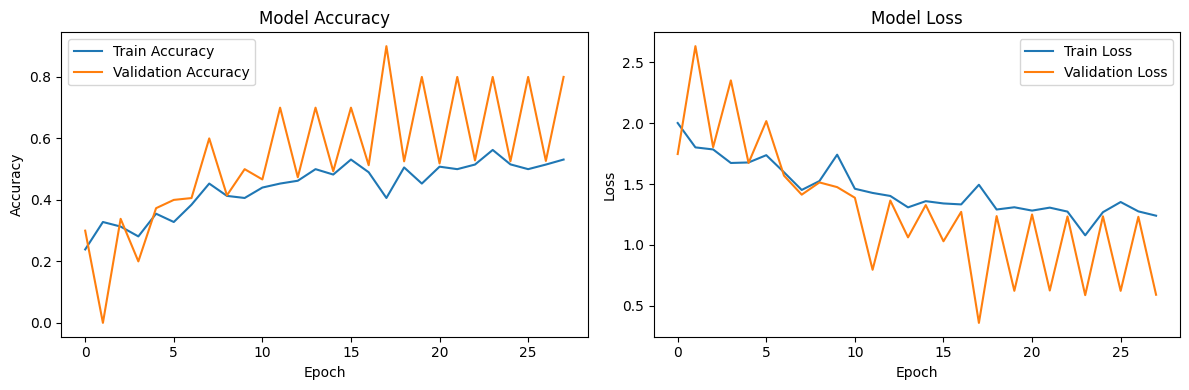

Model training completed and saved.


In [7]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


# Define the model
def create_model(input_shape):
    model = Sequential([
        Conv2D(64, (3, 3), padding='same', input_shape=input_shape),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(128, (5, 5), padding='same'),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(512, (3, 3), padding='same'),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(512, (3, 3), padding='same'),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Flatten(),
        Dense(256),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.25),

        Dense(512),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.25),

        Dense(len(categories), activation='softmax')
    ])
    return model

# Compile the model
model = create_model((img_size, img_size, 1))
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Set up callbacks
checkpoint = ModelCheckpoint("best_model.keras", monitor='val_accuracy',
                             save_best_only=True, mode='max', verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)

callbacks = [checkpoint, early_stop, reduce_lr]

# Train the model
epochs = 50
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks
)

# Evaluate the model
evaluation = model.evaluate(validation_generator)
print(f"Test accuracy: {evaluation[1]*100:.2f}%")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
    
# Save the model
model.save('emotion_recognition_model.keras')

print("Model training completed and saved.")

Evaluating the model...
113/113 ━━━━━━━━━━━━━━━━━━━━ 22s 194ms/step - accuracy: 0.4049 - loss: 1.4685
Test Loss: 1.2689
Test Accuracy: 51.18%


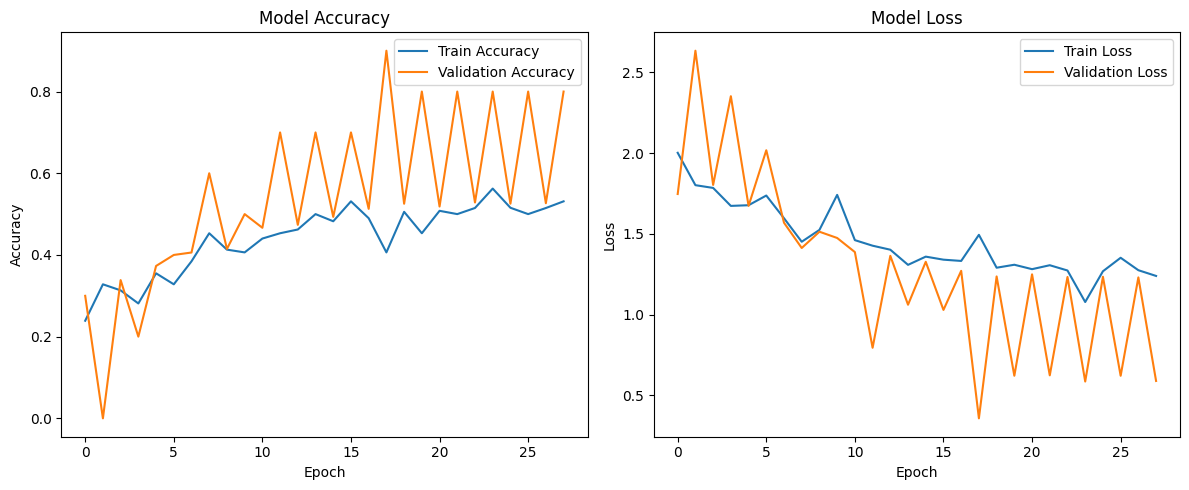

Model saved as 'emotion_recognition_model.h5'
Generating predictions...
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 187ms/step


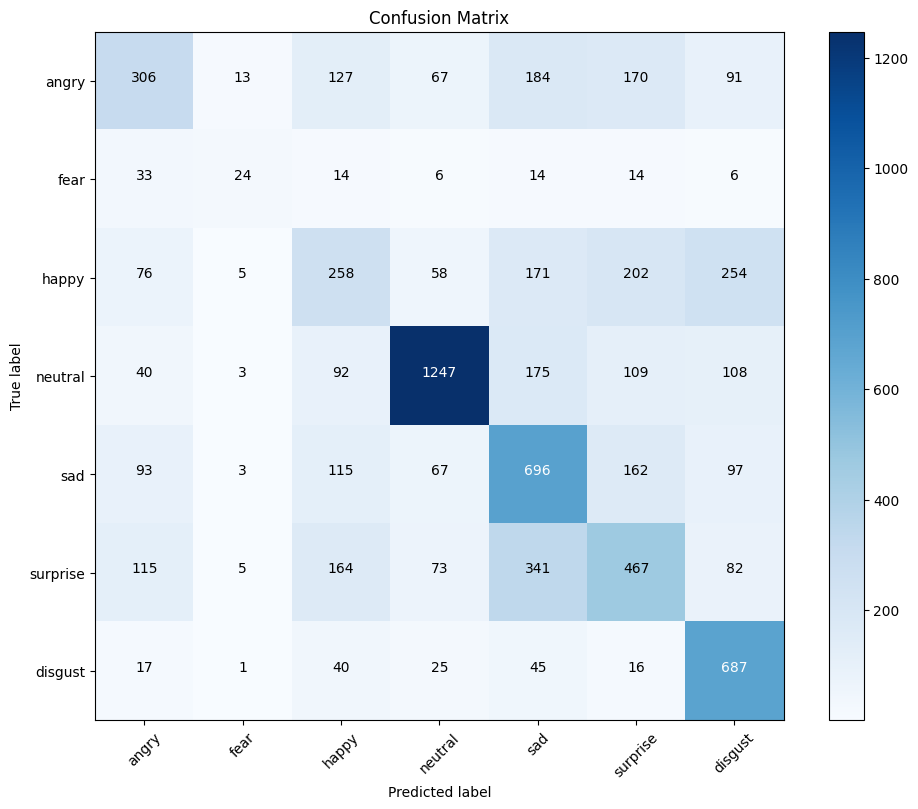


Classification Report:
              precision    recall  f1-score   support

       angry       0.45      0.32      0.37       958
        fear       0.44      0.22      0.29       111
       happy       0.32      0.25      0.28      1024
     neutral       0.81      0.70      0.75      1774
         sad       0.43      0.56      0.49      1233
    surprise       0.41      0.37      0.39      1247
     disgust       0.52      0.83      0.64       831

    accuracy                           0.51      7178
   macro avg       0.48      0.47      0.46      7178
weighted avg       0.52      0.51      0.51      7178



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,02

 Total params: 13,428,247 (51.22 MB)

 Trainable params: 4,474,759 (17.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

 Optimizer params: 8,949,520 (34.14 MB)

None
Plotting sample predictions...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Raw prediction: [0.37682003 0.0720645  0.12216055 0.2435836  0.05555117 0.12495779
 0.00486227]
Predicted probabilities: [0.17922091 0.13214023 0.13892855 0.15686455 0.12997608 0.1393177
 0.12355192]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Raw prediction: [1.6247734e-02 1.4423521e-03 1.2906206e-01 5.4345396e-04 1.6704211e-02
 6.3731396e-03 8.2962704e-01]
Predicted probabilities: [0.11997177 0.11820863 0.1342993  0.11810242 0.12002654 0.11879293
 0.2705984 ]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Raw prediction: [0.5459364  0.32933122 0.07487058 0.01319334 0.00785606 0.02649383
 0.0023185 ]
Predicted probabilities: [0.20938285 0.16860507 0.13072535 0.12290617 0.12225194 0.12455181
 0.12157682]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Raw prediction: [0.10263018 0.01544983 0.6858593  0.03970268 0.01849605 0.0368197
 0.10104223]
Predicted probabilities: [0.13330902 0.12217929 0.23886514 0.12517871 0.12255204 0.12481835
 0

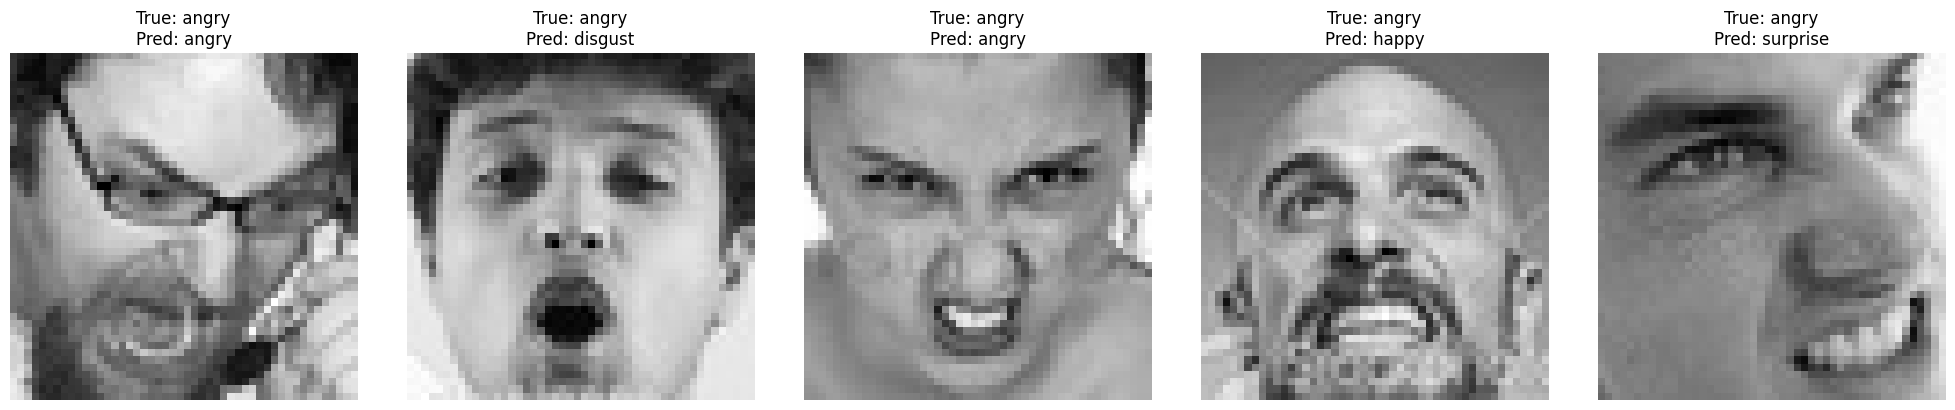

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import tensorflow as tf
from tensorflow.keras.models import load_model

# Assuming 'model', 'history', 'validation_generator', and 'categories' are already defined

# Evaluate the model
print("Evaluating the model...")
evaluation = model.evaluate(validation_generator)
print(f"Test Loss: {evaluation[0]:.4f}")
print(f"Test Accuracy: {evaluation[1]*100:.2f}%")

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Save the model
model.save('emotion_recognition_model.h5')
print("Model saved as 'emotion_recognition_model.h5'")

# Generate predictions
print("Generating predictions...")
predictions = model.predict(validation_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = validation_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(categories))
plt.xticks(tick_marks, categories, rotation=45)
plt.yticks(tick_marks, categories)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=categories))

# Function to plot sample predictions
def plot_sample_predictions(model, validation_generator, num_samples=5):
    plt.figure(figsize=(20, 4))
    for i, (image, label) in enumerate(validation_generator):
        if i >= num_samples:
            break
        prediction = model.predict(image)
        print(f"Raw prediction: {prediction[0]}")
        print(f"Predicted probabilities: {tf.nn.softmax(prediction[0])}")
        predicted_index = np.argmax(prediction[0])
        true_index = np.argmax(label[0])
        
        predicted_class = categories[predicted_index] if predicted_index < len(categories) else f"Unknown ({predicted_index})"
        true_class = categories[true_index] if true_index < len(categories) else f"Unknown ({true_index})"
        
        plt.subplot(1, num_samples, i+1)
        plt.imshow(image[0].squeeze(), cmap='gray')
        plt.title(f"True: {true_class}\nPred: {predicted_class}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Print model summary
print(model.summary())

# Plot sample predictions
print("Plotting sample predictions...")
plot_sample_predictions(model, validation_generator)

# Load the saved model and make a prediction on a single image
def predict_single_image(image_path, model_path):
    loaded_model = load_model(model_path)
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(48, 48), color_mode="grayscale")
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    
    prediction = loaded_model.predict(img_array)
    predicted_class = categories[np.argmax(prediction)]
    return predicted_class

# Example usage (uncomment and provide actual paths to use)
# image_path = 'path/to/your/image.jpg'
# model_path = 'emotion_recognition_model.h5'
# predicted_emotion = predict_single_image(image_path, model_path)
# print(f"Predicted emotion: {predicted_emotion}")

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

def create_vgg_like_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(128, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(128, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(256, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(256, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(256, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    
    return model

# Usage
vgg_model = create_vgg_like_model((48, 48, 1), len(categories))
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\Amine2001\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input, GlobalAveragePooling2D, Activation, Add

def residual_block(x, filters, kernel_size=3, stride=1):
    shortcut = x
    
    x = Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    
    if stride != 1 or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, 1, strides=stride, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)
    
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

def create_resnet_inspired_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    
    x = Conv2D(64, 7, strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(3, strides=2, padding='same')(x)
    
    x = residual_block(x, 64)
    x = residual_block(x, 64)
    x = residual_block(x, 128, stride=2)
    x = residual_block(x, 128)
    x = residual_block(x, 256, stride=2)
    x = residual_block(x, 256)
    
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Usage
resnet_model = create_resnet_inspired_model((48, 48, 1), len(categories))
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dense, BatchNormalization, Activation, Reshape, DepthwiseConv2D, Add

def inverted_residual_block(inputs, expand_ratio, filters, stride):
    input_filters = inputs.shape[-1]
    expanded_filters = input_filters * expand_ratio
    
    x = inputs
    
    # Expansion phase
    if expand_ratio != 1:
        x = Conv2D(expanded_filters, 1, padding='same', use_bias=False)(x)
        x = BatchNormalization()(x)
        x = Activation('relu6')(x)
    
    # Depthwise convolution
    x = DepthwiseConv2D(3, strides=stride, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu6')(x)
    
    # Projection phase
    x = Conv2D(filters, 1, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    
    if stride == 1 and input_filters == filters:
        return Add()([x, inputs])
    return x

def create_mobilenetv2_based_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    
    x = Conv2D(32, 3, strides=2, padding='same', use_bias=False)(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu6')(x)
    
    x = inverted_residual_block(x, expand_ratio=1, filters=16, stride=1)
    x = inverted_residual_block(x, expand_ratio=6, filters=24, stride=2)
    x = inverted_residual_block(x, expand_ratio=6, filters=24, stride=1)
    x = inverted_residual_block(x, expand_ratio=6, filters=32, stride=2)
    x = inverted_residual_block(x, expand_ratio=6, filters=32, stride=1)
    x = inverted_residual_block(x, expand_ratio=6, filters=64, stride=2)
    x = inverted_residual_block(x, expand_ratio=6, filters=64, stride=1)
    
    x = Conv2D(1280, 1, use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu6')(x)
    
    x = GlobalAveragePooling2D()(x)
    x = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=x)
    return model

# Usage
mobilenetv2_model = create_mobilenetv2_based_model((48, 48, 1), len(categories))
mobilenetv2_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Assuming you have already defined these variables:
# categories, img_size, train_generator, validation_generator, steps_per_epoch, validation_steps

# List of model creation functions
model_functions = [
    create_vgg_like_model,
    create_resnet_inspired_model,
    create_mobilenetv2_based_model
]

# Function to train and evaluate a model
def train_and_evaluate_model(model, model_name):
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Set up callbacks
    checkpoint = ModelCheckpoint(f"best_{model_name}.keras", monitor='val_accuracy',
                                 save_best_only=True, mode='max', verbose=1)
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)
    
    callbacks = [checkpoint, early_stop, reduce_lr]
    
    # Train the model
    epochs = 50  # You may want to adjust this
    history = model.fit(
        train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_steps,
        callbacks=callbacks
    )
    
    # Evaluate the model
    evaluation = model.evaluate(validation_generator)
    print(f"{model_name} - Test accuracy: {evaluation[1]*100:.2f}%")
    
    # You can add code here to plot training history, confusion matrix, etc.
    
    return history, evaluation

# Run all models
for model_func in model_functions:
    model_name = model_func.__name__.replace('create_', '').replace('_', '-')
    print(f"\nTraining {model_name}...")
    
    # Create the model
    model = model_func((img_size, img_size, 1), len(categories))
    
    # Train and evaluate
    history, evaluation = train_and_evaluate_model(model, model_name)
    
    # Save the model
    model.save(f'{model_name}.keras')
    print(f"Model saved as '{model_name}.keras'")

print("All models have been trained and evaluated.")


Training vgg-like-model...
Epoch 1/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1772 - loss: 2.8686
Epoch 1: val_accuracy improved from -inf to 0.36007, saving model to best_vgg-like-model.keras
448/448 ━━━━━━━━━━━━━━━━━━━━ 489s 1s/step - accuracy: 0.1773 - loss: 2.8682 - val_accuracy: 0.3601 - val_loss: 1.7437 - learning_rate: 1.0000e-04
Epoch 2/50
  1/448 ━━━━━━━━━━━━━━━━━━━━ 7:02 945ms/step - accuracy: 0.2656 - loss: 2.5311
Epoch 2: val_accuracy improved from 0.36007 to 0.40000, saving model to best_vgg-like-model.keras


c:\Users\Amine2001\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2656 - loss: 2.5311 - val_accuracy: 0.4000 - val_loss: 1.4017 - learning_rate: 1.0000e-04
Epoch 3/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2647 - loss: 2.3029
Epoch 3: val_accuracy did not improve from 0.40000
448/448 ━━━━━━━━━━━━━━━━━━━━ 486s 1s/step - accuracy: 0.2647 - loss: 2.3028 - val_accuracy: 0.3869 - val_loss: 1.6385 - learning_rate: 1.0000e-04
Epoch 4/50
  1/448 ━━━━━━━━━━━━━━━━━━━━ 7:28 1s/step - accuracy: 0.3594 - loss: 1.9692
Epoch 4: val_accuracy improved from 0.40000 to 0.50000, saving model to best_vgg-like-model.keras
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3594 - loss: 1.9692 - val_accuracy: 0.5000 - val_loss: 1.5582 - learning_rate: 1.0000e-04
Epoch 5/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3126 - loss: 2.0526
Epoch 5: val_accuracy did not improve from 0.50000
448/448 ━━━━━━━━━━━━━━━━━━━━ 561s 1s/step - accuracy: 0.3126 - loss: 2.0525 - val_accuracy: 0.4233 - val_lo


Evaluating VGG-like Model...
113/113 ━━━━━━━━━━━━━━━━━━━━ 54s 463ms/step - accuracy: 0.4891 - loss: 1.2906
Test Loss: 1.1603
Test Accuracy: 56.20%
113/113 ━━━━━━━━━━━━━━━━━━━━ 56s 471ms/step

Classification Report:
              precision    recall  f1-score   support

       angry       0.45      0.49      0.47       958
        fear       0.75      0.11      0.19       111
       happy       0.42      0.17      0.24      1024
     neutral       0.77      0.80      0.79      1774
         sad       0.53      0.50      0.51      1233
    surprise       0.41      0.57      0.48      1247
     disgust       0.62      0.76      0.69       831

    accuracy                           0.56      7178
   macro avg       0.57      0.48      0.48      7178
weighted avg       0.56      0.56      0.54      7178



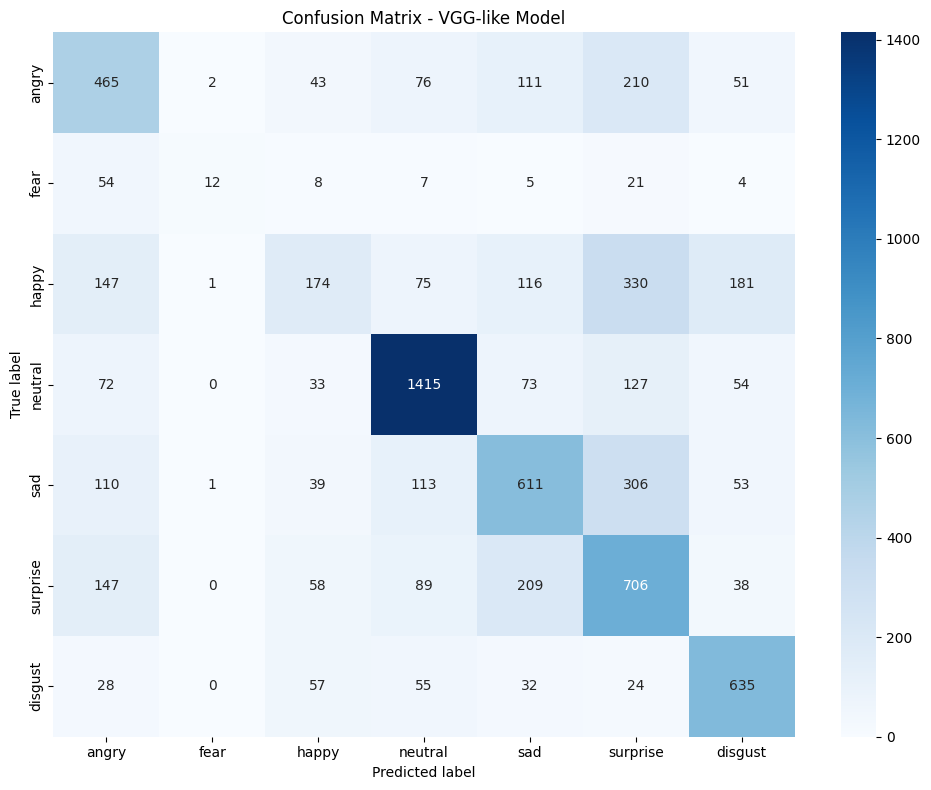

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 271ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 253ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 238ms/step


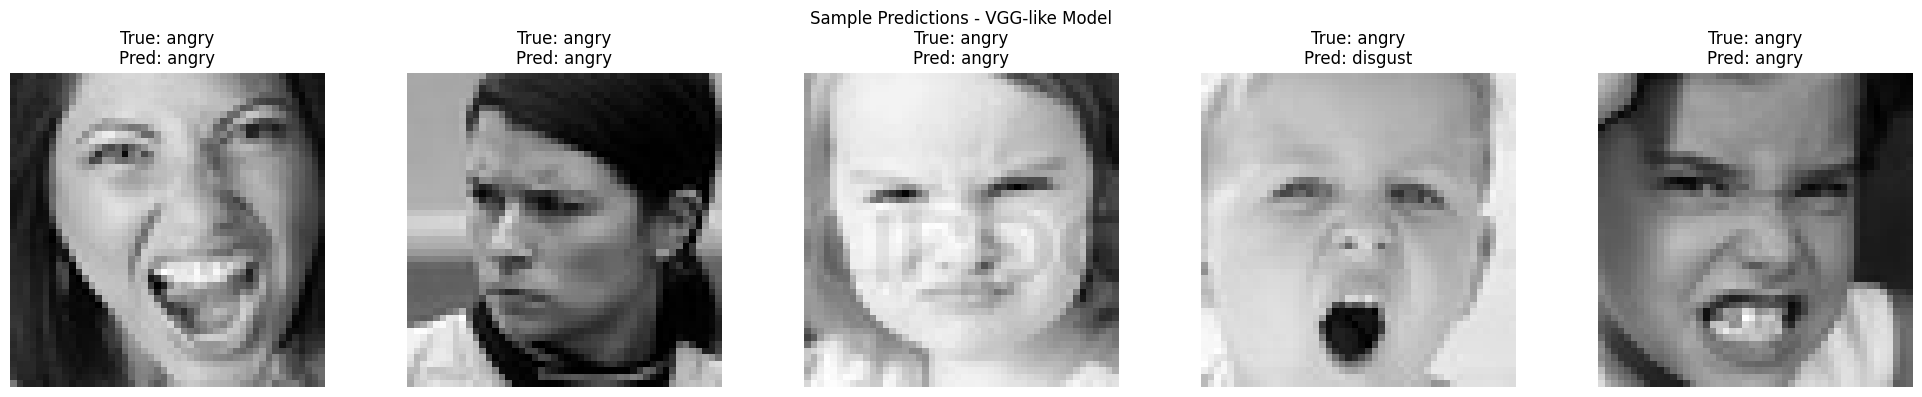


Evaluating ResNet-inspired Model...
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step - accuracy: 0.2479 - loss: 1.8918
Test Loss: 1.6555
Test Accuracy: 36.46%
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 109ms/step

Classification Report:
              precision    recall  f1-score   support

       angry       0.26      0.22      0.24       958
        fear       0.00      0.00      0.00       111
       happy       0.20      0.01      0.02      1024
     neutral       0.69      0.50      0.58      1774
         sad       0.37      0.34      0.35      1233
    surprise       0.35      0.29      0.32      1247
     disgust       0.25      0.86      0.38       831

    accuracy                           0.36      7178
   macro avg       0.30      0.32      0.27      7178
weighted avg       0.39      0.36      0.34      7178



c:\Users\Amine2001\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Amine2001\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Amine2001\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

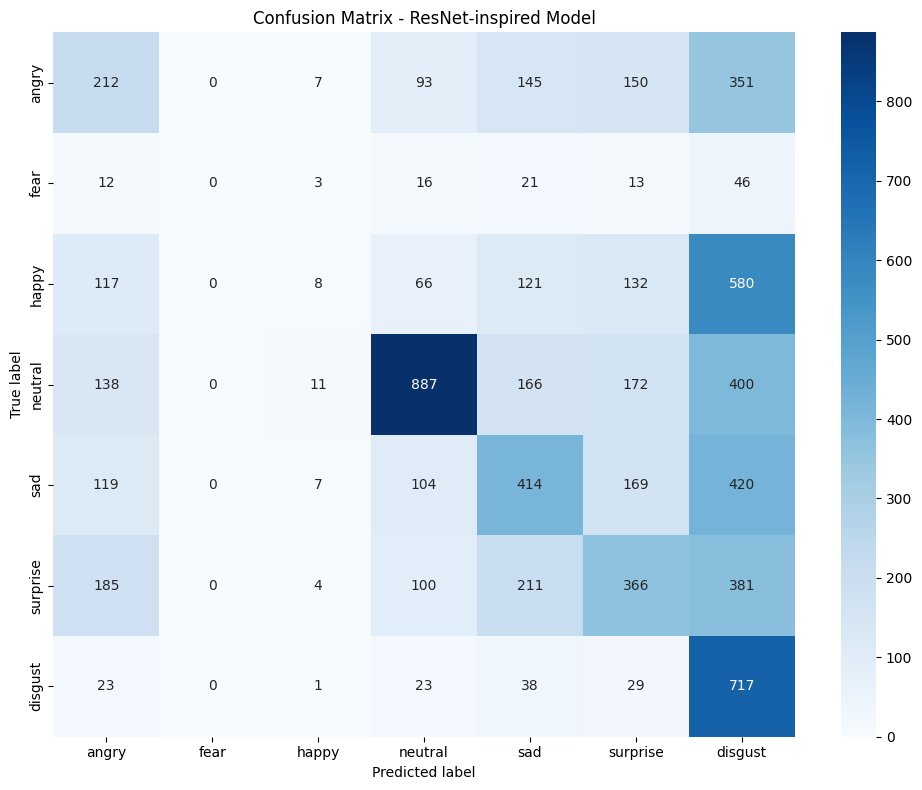

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


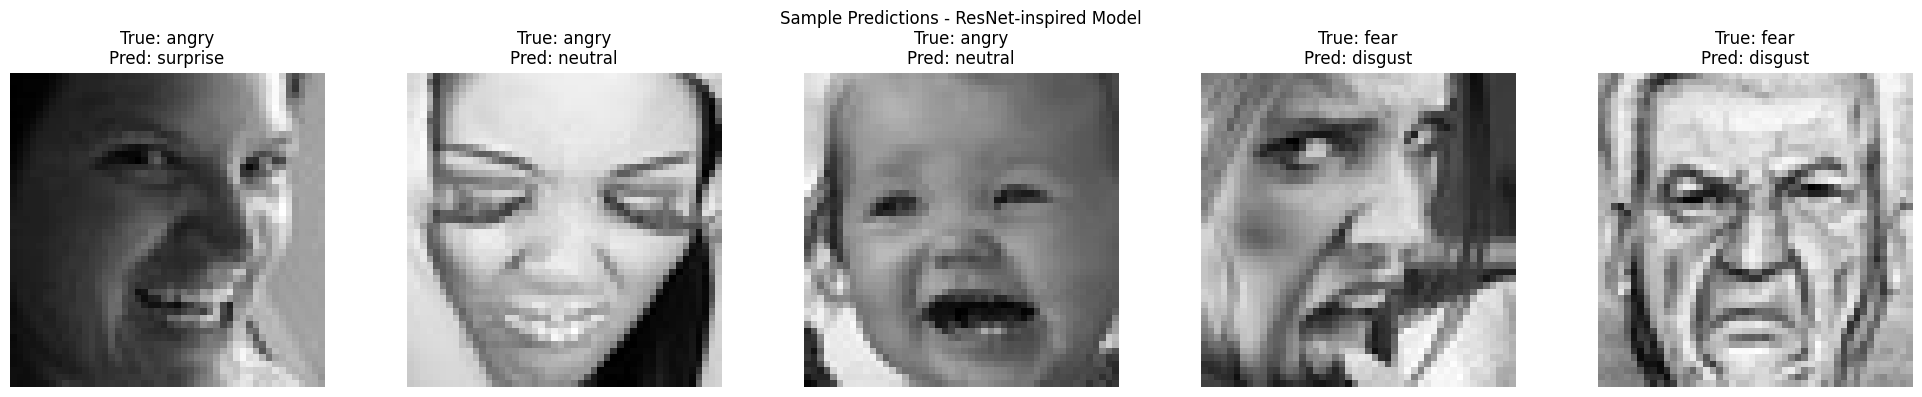


Evaluating MobileNetV2-based Model...
113/113 ━━━━━━━━━━━━━━━━━━━━ 12s 77ms/step - accuracy: 0.3365 - loss: 1.6848
Test Loss: 1.5222
Test Accuracy: 41.17%
113/113 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step

Classification Report:
              precision    recall  f1-score   support

       angry       0.29      0.27      0.28       958
        fear       0.50      0.01      0.02       111
       happy       0.30      0.16      0.21      1024
     neutral       0.53      0.66      0.59      1774
         sad       0.36      0.44      0.40      1233
    surprise       0.35      0.23      0.28      1247
     disgust       0.47      0.68      0.55       831

    accuracy                           0.42      7178
   macro avg       0.40      0.35      0.33      7178
weighted avg       0.40      0.42      0.40      7178



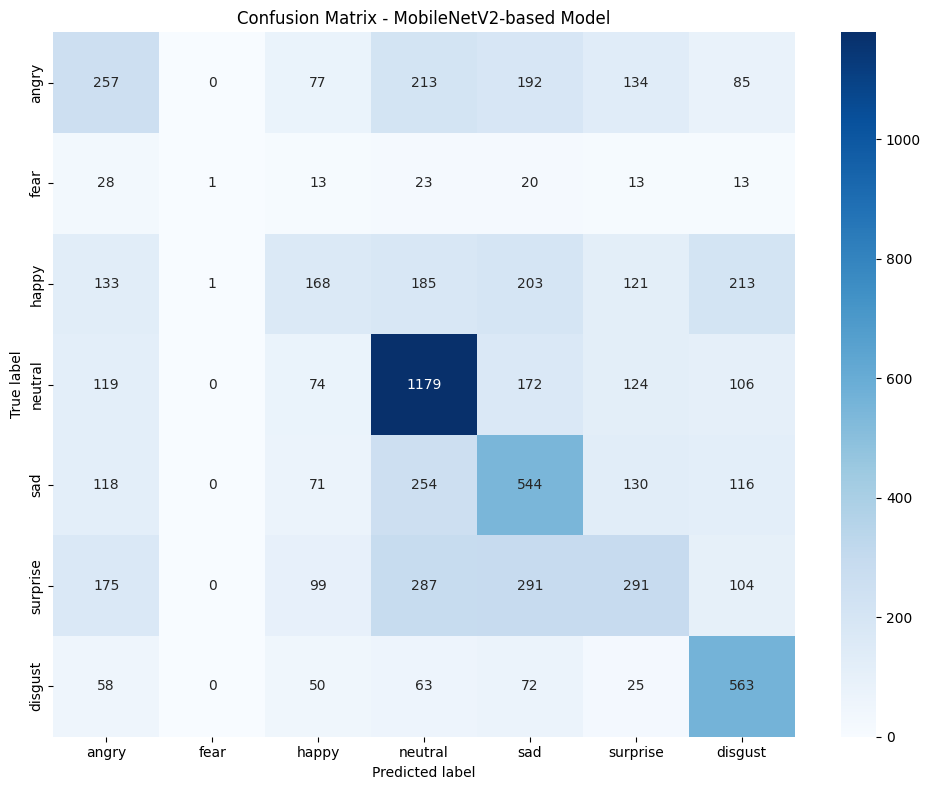

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


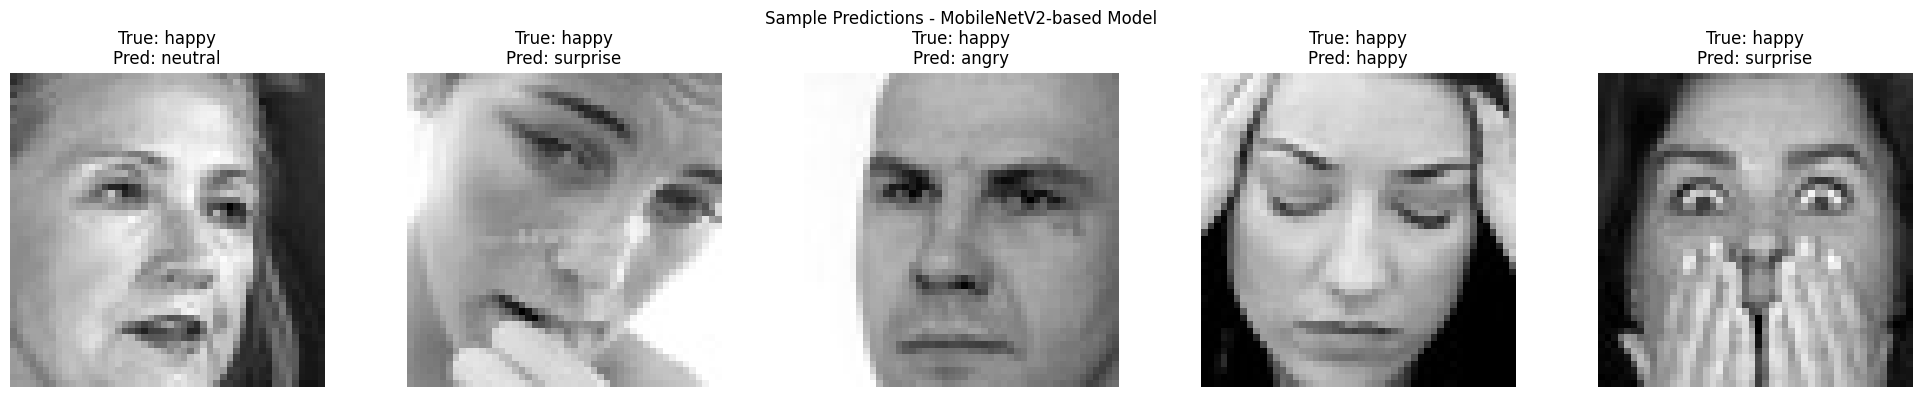

Evaluation of all models completed.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.models import load_model

# Assuming you have these variables defined:
# categories, img_size, validation_generator

def evaluate_model(model_path, model_name):
    print(f"\nEvaluating {model_name}...")
    
    # Load the model
    model = load_model(model_path)
    
    # Evaluate the model
    evaluation = model.evaluate(validation_generator)
    print(f"Test Loss: {evaluation[0]:.4f}")
    print(f"Test Accuracy: {evaluation[1]*100:.2f}%")
    
    # Generate predictions
    predictions = model.predict(validation_generator)
    y_pred = np.argmax(predictions, axis=1)
    y_true = validation_generator.classes
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=categories))
    
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
    
    # Sample predictions
    plot_sample_predictions(model, validation_generator, model_name)

def plot_sample_predictions(model, validation_generator, model_name, num_samples=5):
    plt.figure(figsize=(20, 4))
    for i, (image, label) in enumerate(validation_generator):
        if i >= num_samples:
            break
        prediction = model.predict(image)
        predicted_index = np.argmax(prediction[0])
        true_index = np.argmax(label[0])
        
        predicted_class = categories[predicted_index]
        true_class = categories[true_index]
        
        plt.subplot(1, num_samples, i+1)
        plt.imshow(image[0].squeeze(), cmap='gray')
        plt.title(f"True: {true_class}\nPred: {predicted_class}")
        plt.axis('off')
    
    plt.suptitle(f"Sample Predictions - {model_name}")
    plt.tight_layout()
    plt.show()

# List of model files
model_files = [
    ('vgg-like-model.keras', 'VGG-like Model'),
    ('resnet-inspired-model.keras', 'ResNet-inspired Model'),
    ('mobilenetv2-based-model.keras', 'MobileNetV2-based Model')
]

# Evaluate all models
for model_file, model_name in model_files:
    evaluate_model(model_file, model_name)

print("Evaluation of all models completed.")